In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [5]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)

In [6]:
#we dont care about Y vALUES


In [7]:
x.shape

(1000, 2)

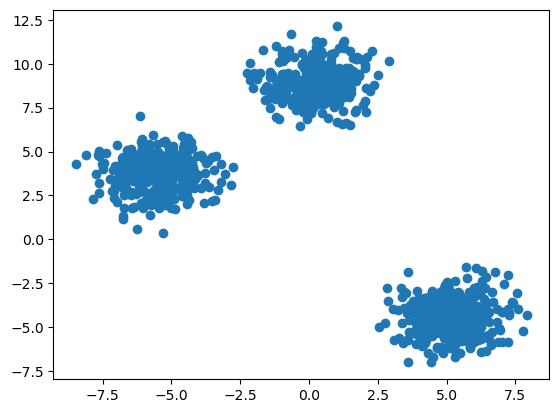

In [12]:
plt.scatter(x[:,0],x[:,1])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [15]:
from sklearn.cluster import KMeans

In [16]:
#manual process
#elbow method to select the k value

In [63]:
x_train

array([[ 5.18030204, -3.9954647 ],
       [ 7.22929836, -5.82795817],
       [ 5.56138471, -4.25534701],
       ...,
       [ 2.54487099, -4.98136265],
       [-4.97077328,  2.51161386],
       [ 4.2804877 , -4.61462407]])

In [17]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
    

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [18]:
wcss

[34827.576825520206,
 7935.437286145417,
 1319.2730531585607,
 1140.4677884655123,
 992.070850938351,
 853.5719411208651,
 754.4210271249001,
 663.90678564534,
 579.5674636142248,
 534.4158519554644]

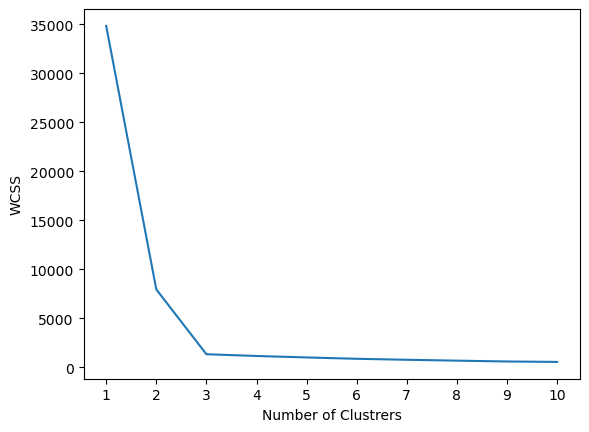

In [28]:
#plot elbow
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()


In [29]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [31]:
y_labels=kmeans.fit_predict(x_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


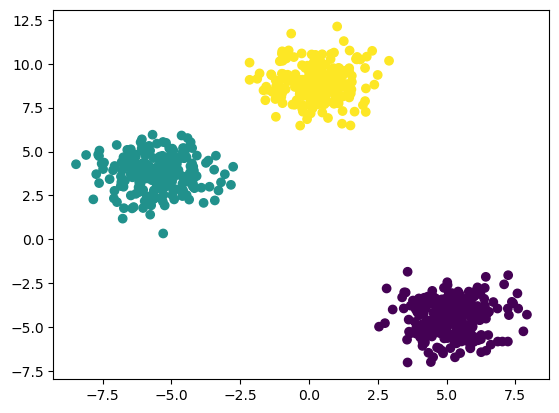

In [32]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

In [34]:
y_test_labels=kmeans.predict(x_test)

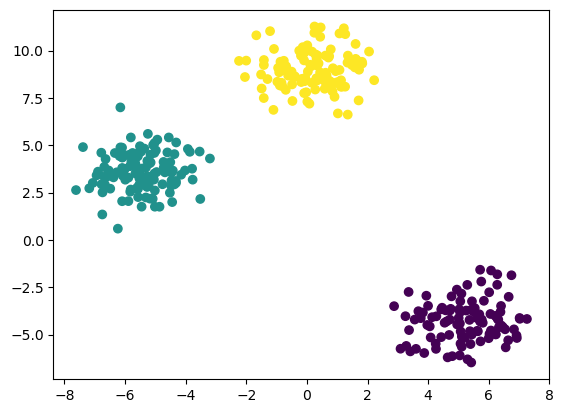

In [36]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_labels)

In [37]:
# knee locater
!pip install kneed

In [42]:
from kneed import KneeLocator

In [48]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction='decreasing')
kl.elbow

3

In [64]:
##performance score
from sklearn.metrics import silhouette_score

In [65]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [67]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.33691828928108875,
 0.3442959350461067,
 0.34213244844929996,
 0.34513130468262226,
 0.3420320977253967]

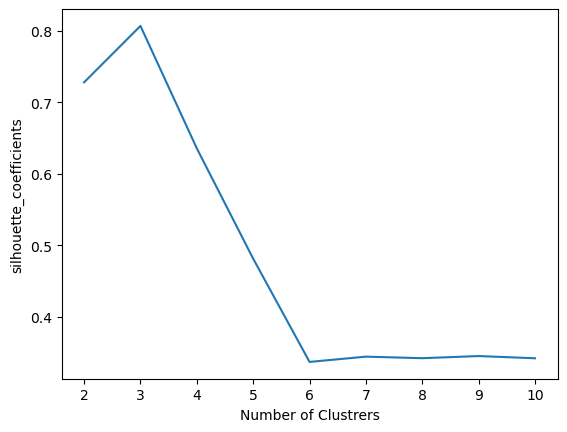

In [69]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("silhouette_coefficients")
plt.show()
